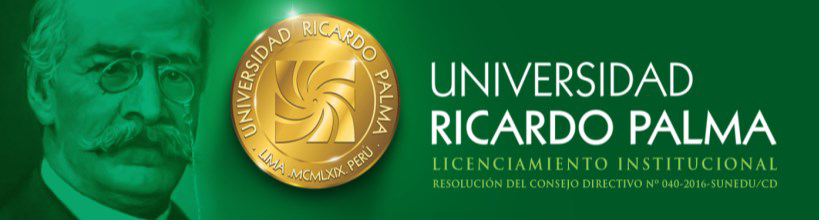

# Detección de delitos

In [ ]:
# Instalar YOLOv8 (Ultralytics)
!pip install ultralytics

# Dependencias adicionales
!pip install roboflow
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# Librerías necesarias
import os
import shutil
import yaml
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO

import random
from sklearn.model_selection import train_test_split

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Descargar datos desde Roboflow

rf = Roboflow(api_key="4FODTx7cnvUVaiWDx5dI")

project_robo_mano_armada = rf.workspace("revisiondata").project("robo_a_mano_armada_sa")
dataset_robo_mano_armada  = project_robo_mano_armada.version(6).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Robo_a_mano_armada_sa-6 in yolov8:: 100%|██████████| 3394/3394 [00:00<00:00, 5112.09it/s]


In [ ]:

project_robo_en_tienda = rf.workspace("revisiondata").project("robo_en_tienda")
dataset_robo_en_tienda = project_robo_en_tienda.version(7).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Robo_en_Tienda-7 in yolov8:: 100%|██████████| 2128/2128 [00:00<00:00, 6065.24it/s]


In [ ]:

project_vandalismo = rf.workspace("revisiondata").project("vandalismo-fpszl")
dataset_vandalismo = project_vandalismo.version(11).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vandalismo-11 in yolov8:: 100%|██████████| 1964/1964 [00:00<00:00, 7758.14it/s]


In [ ]:
project_actividad_normal = rf.workspace("revisiondata").project("actividad_normal")
dataset_actividad_normal = project_actividad_normal.version(7).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Actividad_Normal-7 in yolov8:: 100%|██████████| 1912/1912 [00:00<00:00, 5330.90it/s]


In [ ]:
print(f"Robo_mano_armada: {dataset_robo_mano_armada.location}")
print(f"Robo_en_tienda: {dataset_robo_en_tienda.location}")
print(f"Vandalismo: {dataset_vandalismo.location}")
print(f"Actividad_normal: {dataset_actividad_normal.location}")
#print(f"Arma: {dataset_arma.location}")

Robo_mano_armada: /content/Robo_a_mano_armada_sa-6
Robo_en_tienda: /content/Robo_en_Tienda-7
Vandalismo: /content/Vandalismo-11
Actividad_normal: /content/Actividad_Normal-7


In [ ]:
def verificar_estructura(dataset_path, nombre):
    print(f"\nVerificando {nombre}:")
    print(f"Ruta: {dataset_path}")

    train_img = os.path.join(dataset_path, 'train', 'images')
    train_lbl = os.path.join(dataset_path, 'train', 'labels')
    valid_img = os.path.join(dataset_path, 'valid', 'images')
    test_img = os.path.join(dataset_path, 'test', 'images')

    if os.path.exists(train_img):
        num_train_img = len([f for f in os.listdir(train_img) if f.endswith(('.jpg', '.png'))])
        print(f"Train imágenes: {num_train_img}")

    if os.path.exists(train_lbl):
        num_train_lbl = len([f for f in os.listdir(train_lbl) if f.endswith('.txt')])
        print(f"Train etiquetas: {num_train_lbl}")

    if os.path.exists(valid_img):
        num_valid = len([f for f in os.listdir(valid_img) if f.endswith(('.jpg', '.png'))])
        print(f"Valid imágenes: {num_valid}")
    else:
        print("Valid: No existe")

    if os.path.exists(test_img):
        num_test = len([f for f in os.listdir(test_img) if f.endswith(('.jpg', '.png'))])
        print(f"Test imágenes: {num_test}")
    else:
        print("Test: No existe")


In [ ]:
verificar_estructura(dataset_robo_mano_armada.location, "Robo_mano_armada")
verificar_estructura(dataset_robo_en_tienda.location, "Robo_en_tienda")
verificar_estructura(dataset_vandalismo.location, "Vandalismo")
verificar_estructura(dataset_actividad_normal.location, "Actividad_normal")


Verificando Robo_mano_armada:
Ruta: /content/Robo_a_mano_armada_sa-6
Train imágenes: 1694
Train etiquetas: 1694
Valid: No existe
Test: No existe

Verificando Robo_en_tienda:
Ruta: /content/Robo_en_Tienda-7
Train imágenes: 1061
Train etiquetas: 1061
Valid: No existe
Test: No existe

Verificando Vandalismo:
Ruta: /content/Vandalismo-11
Train imágenes: 979
Train etiquetas: 979
Valid: No existe
Test: No existe

Verificando Actividad_normal:
Ruta: /content/Actividad_Normal-7
Train imágenes: 953
Train etiquetas: 953
Valid: No existe
Test: No existe


In [ ]:
def verificar_orden_archivos(dataset_path, nombre):
    train_img = os.path.join(dataset_path, 'train', 'images')

    if os.path.exists(train_img):
        archivos = [f for f in os.listdir(train_img) if f.endswith(('.jpg', '.png'))]
        archivos.sort()

        print(f"\n{nombre} - Primeros 10 archivos:")
        for i, archivo in enumerate(archivos[:10]):
            print(f"{i+1}: {archivo}")

        print(f"\nTotal archivos: {len(archivos)}")
        return archivos
    return []


In [ ]:
archivos_robo_mano_armada = verificar_orden_archivos(dataset_robo_mano_armada.location, "Robo_mano_armada")
archivos_robo_en_tienda = verificar_orden_archivos(dataset_robo_en_tienda.location, "Robo_en_tienda")
archivos_vandalismo = verificar_orden_archivos(dataset_vandalismo.location, "Vandalismo")
archivos_actividad_normal = verificar_orden_archivos(dataset_actividad_normal.location, "Actividad_normal")


Robo_mano_armada - Primeros 10 archivos:
1: Robbery002_x264_000083_jpg.rf.4cc0b141bfb6a11cf5f13660da27f7f3.jpg
2: Robbery002_x264_000084_jpg.rf.338d54b4f30207c5e3f5bb2a2236fab6.jpg
3: Robbery002_x264_000085_jpg.rf.2fddb3847fd821a5bf15fc44c2182732.jpg
4: Robbery002_x264_000086_jpg.rf.d1e601cf0c370fd0dfdf014be2c8511b.jpg
5: Robbery002_x264_000087_jpg.rf.840bcffbb1ee87195dd1ab9b25811b33.jpg
6: Robbery002_x264_000088_jpg.rf.77e8ed683b360640e8dccc739061236c.jpg
7: Robbery002_x264_000089_jpg.rf.33638deef5d6bd6a1c5a9ccd08f9cff2.jpg
8: Robbery002_x264_000090_jpg.rf.631f6805dd2eec5c23187a5fa44bbfd3.jpg
9: Robbery002_x264_000091_jpg.rf.b2dbce7adf4ab58e2300dce3c574b77f.jpg
10: Robbery002_x264_000092_jpg.rf.490a728c57b80b12f1d6572d60653277.jpg

Total archivos: 1694

Robo_en_tienda - Primeros 10 archivos:
1: Shoplifting001_x264_000001_jpg.rf.69f1b16654decfdbae321cebe269cbe3.jpg
2: Shoplifting001_x264_000002_jpg.rf.5d5915ec5e5792d875dc33564cbbb516.jpg
3: Shoplifting001_x264_000003_jpg.rf.2b972cd63e

In [ ]:
def dividir_datos_ordenados(archivos, train_ratio=0.7, valid_ratio=0.2, test_ratio=0.1):
    total = len(archivos)

    train_end = int(total * train_ratio)
    valid_end = int(total * (train_ratio + valid_ratio))

    train_files = archivos[:train_end]
    valid_files = archivos[train_end:valid_end]
    test_files = archivos[valid_end:]

    print(f"División ordenada:")
    print(f"Train: {len(train_files)} archivos")
    print(f"Valid: {len(valid_files)} archivos")
    print(f"Test: {len(test_files)} archivos")

    return train_files, valid_files, test_files

In [ ]:
train_robo_mano_armada, valid_robo_mano_armada, test_robo_mano_armada = dividir_datos_ordenados(archivos_robo_mano_armada)
train_robo_en_tienda, valid_robo_en_tienda, test_robo_en_tienda = dividir_datos_ordenados(archivos_robo_en_tienda)
train_vandalismo, valid_vandalismo, test_vandalismo = dividir_datos_ordenados(archivos_vandalismo)
train_actividad_normal, valid_actividad_normal, test_actividad_normal = dividir_datos_ordenados(archivos_actividad_normal)

División ordenada:
Train: 1185 archivos
Valid: 339 archivos
Test: 170 archivos
División ordenada:
Train: 742 archivos
Valid: 212 archivos
Test: 107 archivos
División ordenada:
Train: 685 archivos
Valid: 196 archivos
Test: 98 archivos
División ordenada:
Train: 667 archivos
Valid: 190 archivos
Test: 96 archivos


In [ ]:
def crear_estructura_unificada():
    splits = ['train', 'valid', 'test']
    tipos = ['images', 'labels']

    for split in splits:
        for tipo in tipos:
            carpeta = f'Actividades_Unified/{split}/{tipo}'
            os.makedirs(carpeta, exist_ok=True)


In [ ]:
crear_estructura_unificada()

In [ ]:
def leer_clases_yaml(yaml_path):
    with open(yaml_path, 'r') as f:
        config = yaml.safe_load(f)
    return config['names']

def convertir_a_dict(clases):
    if isinstance(clases, list):
        return {i: nombre for i, nombre in enumerate(clases)}
    return clases

clases_robo_mano_armada = convertir_a_dict(leer_clases_yaml(os.path.join(dataset_robo_mano_armada.location, 'data.yaml')))
clases_robo_en_tienda = convertir_a_dict(leer_clases_yaml(os.path.join(dataset_robo_en_tienda.location, 'data.yaml')))
clases_vandalismo = convertir_a_dict(leer_clases_yaml(os.path.join(dataset_vandalismo.location, 'data.yaml')))
clases_actividad_normal = convertir_a_dict(leer_clases_yaml(os.path.join(dataset_actividad_normal.location, 'data.yaml')))

print("Clases robo_mano_armada:", clases_robo_mano_armada)
print("Clases robo_en_tienda:", clases_robo_en_tienda)
print("Clases vandalismo:", clases_vandalismo)
print("Clases actividad_normal:", clases_actividad_normal)

Clases robo_mano_armada: {0: 'victima', 1: 'victimario'}
Clases robo_en_tienda: {0: 'victimario'}
Clases vandalismo: {0: 'grafiti', 1: 'victimario'}
Clases actividad_normal: {0: 'persona'}


In [ ]:
clases_unificadas = {}
mapeo_robo_mano_armada = {}
mapeo_robo_en_tienda = {}
mapeo_vandalismo = {}
mapeo_actividad_normal = {}

indice_actual = 0

for i, nombre in clases_robo_mano_armada.items():
    clases_unificadas[indice_actual] = f"robo_mano_armada_{nombre}"
    mapeo_robo_mano_armada[i] = indice_actual
    indice_actual += 1

for i, nombre in clases_robo_en_tienda.items():
    clases_unificadas[indice_actual] = f"robo_en_tienda_{nombre}"
    mapeo_robo_en_tienda[i] = indice_actual
    indice_actual += 1

for i, nombre in clases_vandalismo.items():
    clases_unificadas[indice_actual] = f"vandalismo_{nombre}"
    mapeo_vandalismo[i] = indice_actual
    indice_actual += 1

for i, nombre in clases_actividad_normal.items():
    clases_unificadas[indice_actual] = f"actividad_normal_{nombre}"
    mapeo_actividad_normal[i] = indice_actual
    indice_actual += 1

print("\nClases unificadas:")
for i, nombre in clases_unificadas.items():
    print(f"{i}: {nombre}")


Clases unificadas:
0: robo_mano_armada_victima
1: robo_mano_armada_victimario
2: robo_en_tienda_victimario
3: vandalismo_grafiti
4: vandalismo_victimario
5: actividad_normal_persona


In [ ]:
def actualizar_etiquetas(archivo_origen, archivo_destino, mapeo_clases):
    with open(archivo_origen, 'r') as f:
        lineas = f.readlines()

    with open(archivo_destino, 'w') as f:
        for linea in lineas:
            partes = linea.strip().split()
            if len(partes) > 0:
                clase_original = int(partes[0])
                if clase_original in mapeo_clases:
                    clase_nueva = mapeo_clases[clase_original]
                    partes[0] = str(clase_nueva)
                    f.write(' '.join(partes) + '\n')

def copiar_archivos_divididos(dataset_path, prefijo, mapeo_clases, train_files, valid_files, test_files):
    original_train_img = os.path.join(dataset_path, 'train', 'images')
    original_train_lbl = os.path.join(dataset_path, 'train', 'labels')

    divisiones = {
        'train': train_files,
        'valid': valid_files,
        'test': test_files
    }

    for split, archivos in divisiones.items():
        for archivo in archivos:
            # Copiar imagen
            src_img = os.path.join(original_train_img, archivo)
            dst_img = f'Actividades_Unified/{split}/images/{prefijo}_{archivo}'
            if os.path.exists(src_img):
                shutil.copy2(src_img, dst_img)

            # Copiar etiqueta
            lbl_name = archivo.replace('.jpg', '.txt').replace('.png', '.txt')
            src_lbl = os.path.join(original_train_lbl, lbl_name)
            dst_lbl = f'Actividades_Unified/{split}/labels/{prefijo}_{lbl_name}'
            if os.path.exists(src_lbl):
                actualizar_etiquetas(src_lbl, dst_lbl, mapeo_clases)


In [ ]:

print("Copiando Robo a mano armada...")
copiar_archivos_divididos(dataset_robo_mano_armada.location, 'robo_mano_armada', mapeo_robo_mano_armada,
                         train_robo_mano_armada, valid_robo_mano_armada, test_robo_mano_armada)


Copiando Robo a mano armada...


In [ ]:

print("Copiando robo_en_tienda...")
copiar_archivos_divididos(dataset_robo_en_tienda.location, 'robo_en_tienda', mapeo_robo_en_tienda,
                         train_robo_en_tienda, valid_robo_en_tienda, test_robo_en_tienda)


Copiando robo_en_tienda...


In [ ]:

print("Copiando vandalismo...")
copiar_archivos_divididos(dataset_vandalismo.location, 'vandalismo', mapeo_vandalismo,
                         train_vandalismo, valid_vandalismo, test_vandalismo)

Copiando vandalismo...


In [ ]:

print("Copiando actividad_normal...")
copiar_archivos_divididos(dataset_actividad_normal.location, 'actividad_normal', mapeo_actividad_normal,
                         train_actividad_normal, valid_actividad_normal, test_actividad_normal)

Copiando actividad_normal...


In [ ]:
def verificar_datos_unificados():
    splits = ['train', 'valid', 'test']

    for split in splits:
        img_path = f'Actividades_Unified/{split}/images'
        lbl_path = f'Actividades_Unified/{split}/labels'

        num_img = len([f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png'))])
        num_lbl = len([f for f in os.listdir(lbl_path) if f.endswith('.txt')])

        print(f"{split}: {num_img} imágenes, {num_lbl} etiquetas")

verificar_datos_unificados()

train: 3279 imágenes, 3279 etiquetas
valid: 937 imágenes, 937 etiquetas
test: 471 imágenes, 471 etiquetas


In [ ]:
#4687

In [ ]:
def visualizar_muestra_split(split='train', num_muestras=3):
    # Definimos las clases por categoría
    clases_robo_mano_armada = ['victima', 'victimario']
    clases_robo_en_tienda = ['victimario']
    clases_vandalismo = ['graffiti', 'victimario']
    clases_actividad_normal = ['persona']

    total_clases = (
        clases_robo_mano_armada +
        clases_robo_en_tienda +
        clases_vandalismo +
        clases_actividad_normal
    )

    idx_robo = len(clases_robo_mano_armada)
    idx_tienda = idx_robo + len(clases_robo_en_tienda)
    idx_vandalismo = idx_tienda + len(clases_vandalismo)
    # actividad_normal ocupa el resto

    img_path = f'Actividades_Unified/{split}/images'
    lbl_path = f'Actividades_Unified/{split}/labels'

    archivos = [f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png'))]
    archivos.sort()
    muestras = archivos[:num_muestras]

    fig, axes = plt.subplots(1, len(muestras), figsize=(15, 5))
    if len(muestras) == 1:
        axes = [axes]

    for i, img_name in enumerate(muestras):
        img_file = os.path.join(img_path, img_name)
        image = cv2.imread(img_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width = image.shape[:2]

        lbl_file = os.path.join(lbl_path, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(lbl_file):
            with open(lbl_file, 'r') as f:
                lines = f.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    clase = int(parts[0])
                    x_center, y_center, w, h = map(float, parts[1:])

                    # Convertir a píxeles
                    x1 = int((x_center - w / 2) * width)
                    y1 = int((y_center - h / 2) * height)
                    x2 = int((x_center + w / 2) * width)
                    y2 = int((y_center + h / 2) * height)

                    # Colores por categoría
                    if clase < idx_robo:
                        color = (255, 0, 0)      # 🔴 robo mano armada
                    elif clase < idx_tienda:
                        color = (0, 255, 0)      # 🟢 robo tienda
                    elif clase < idx_vandalismo:
                        color = (0, 0, 255)      # 🔵 vandalismo
                    else:
                        color = (255, 255, 0)    # 🟡 actividad normal

                    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

                    # Mostrar nombre de la clase (opcional)
                    nombre_clase = total_clases[clase] if clase < len(total_clases) else f"class_{clase}"
                    cv2.putText(image, nombre_clase, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

        axes[i].imshow(image)
        axes[i].set_title(f"{split}: {img_name}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

Muestras Train:


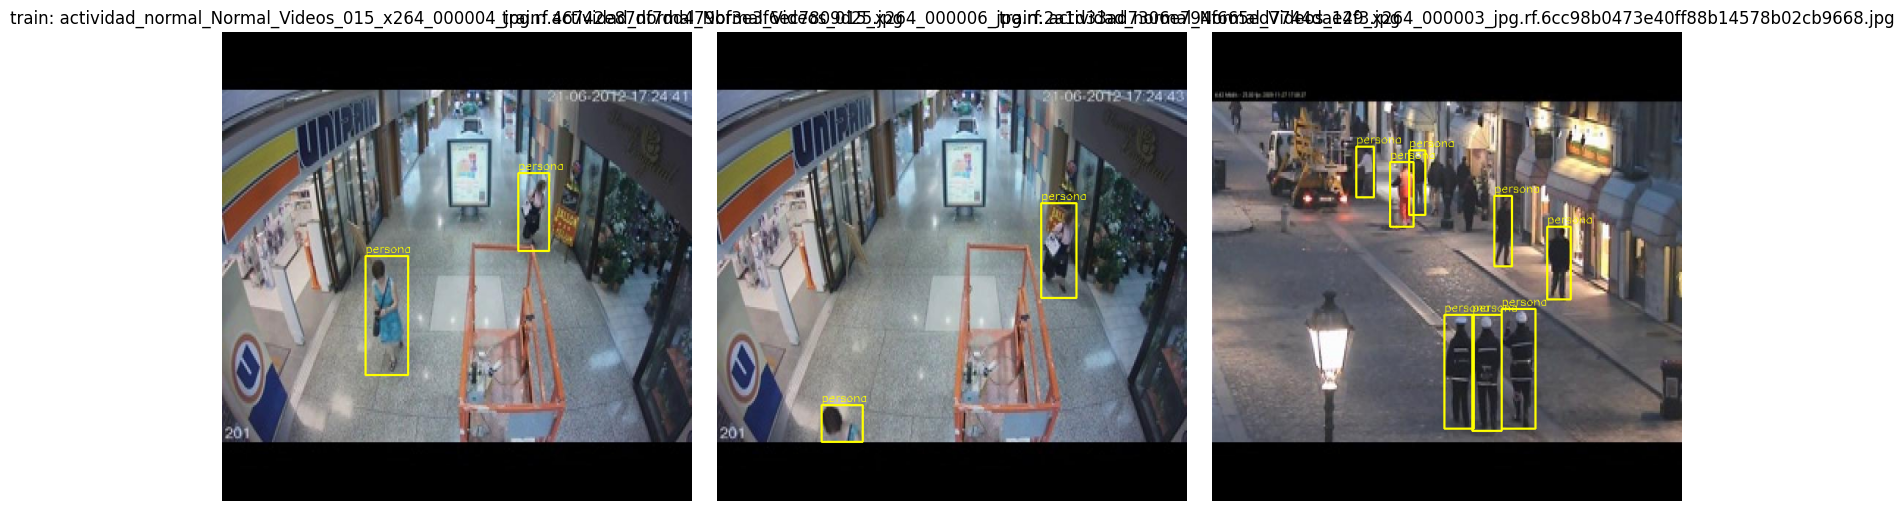

In [ ]:
print("Muestras Train:")
visualizar_muestra_split('train')



Muestras Valid:


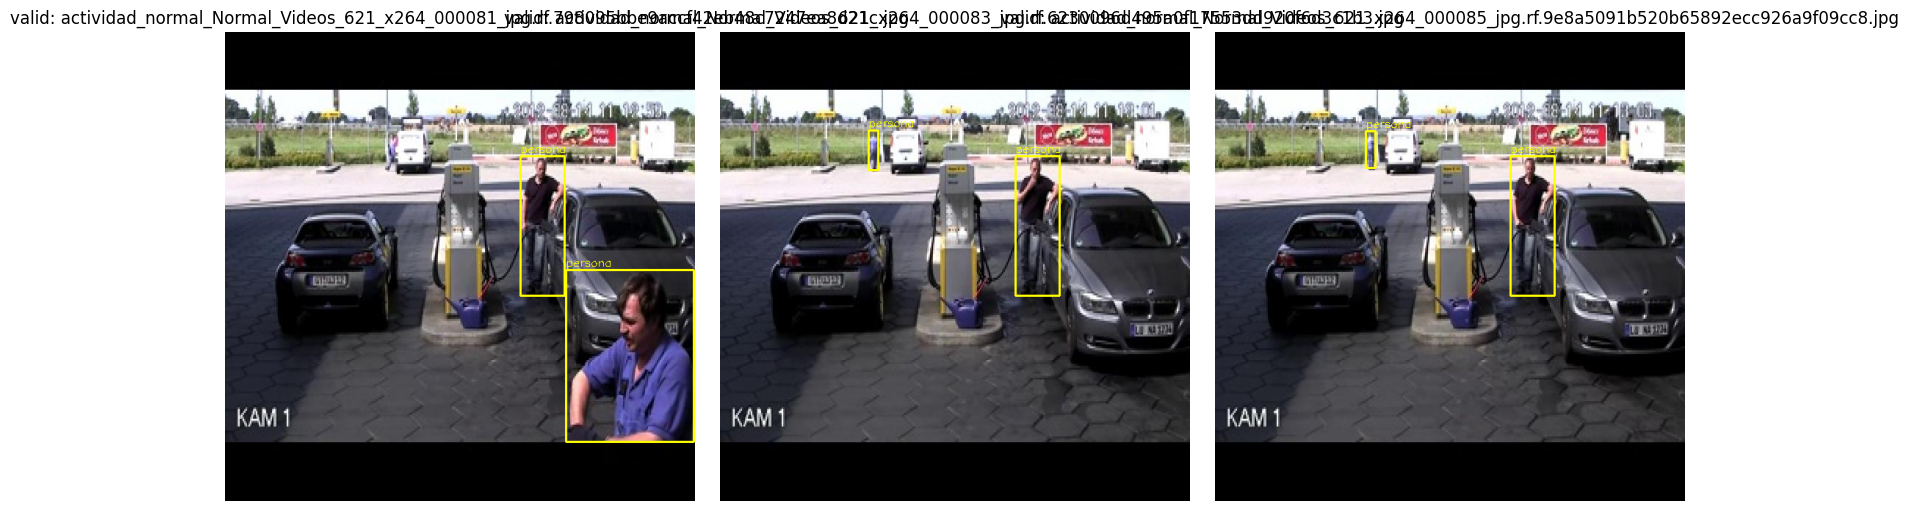

In [ ]:
print("Muestras Valid:")
visualizar_muestra_split('valid')



Muestras Valid:


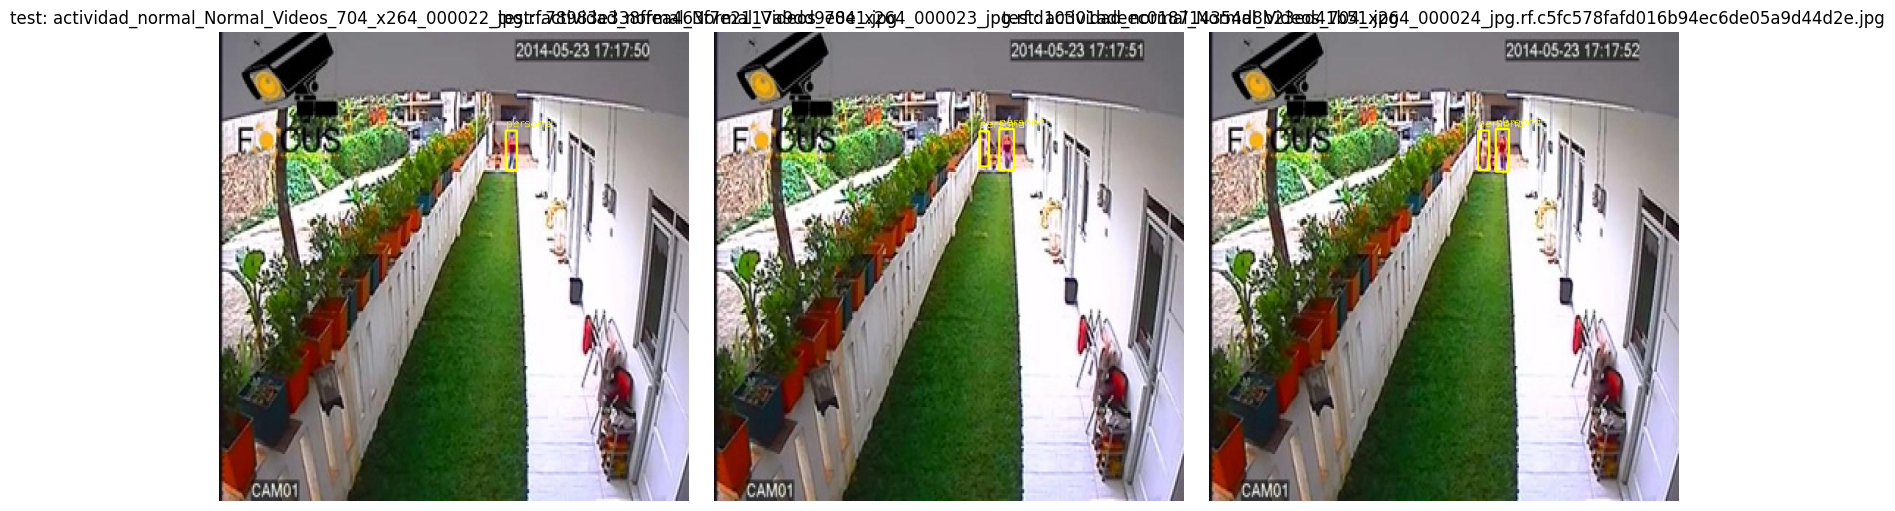

In [ ]:
print("Muestras Valid:")
visualizar_muestra_split('test')



In [ ]:
import os
import cv2
import numpy as np

def rotar_imagen_y_etiqueta(image_path, label_path, angle, output_img_path, output_lbl_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_REPLICATE)

    with open(label_path, 'r') as f:
        lines = f.readlines()

    nuevas_lineas = []
    for line in lines:
        clase, x_c, y_c, ancho, alto = map(float, line.strip().split())
        x1 = (x_c - ancho / 2) * w
        y1 = (y_c - alto / 2) * h
        x2 = (x_c + ancho / 2) * w
        y2 = (y_c + alto / 2) * h
        box = np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]])
        ones = np.ones((box.shape[0], 1))
        box_hom = np.hstack([box, ones])
        box_rotated = M.dot(box_hom.T).T
        x_min, y_min = np.min(box_rotated, axis=0)
        x_max, y_max = np.max(box_rotated, axis=0)
        x_min = np.clip(x_min, 0, w)
        x_max = np.clip(x_max, 0, w)
        y_min = np.clip(y_min, 0, h)
        y_max = np.clip(y_max, 0, h)
        new_x = ((x_min + x_max) / 2) / w
        new_y = ((y_min + y_max) / 2) / h
        new_w = (x_max - x_min) / w
        new_h = (y_max - y_min) / h
        nuevas_lineas.append(f"{int(clase)} {new_x:.6f} {new_y:.6f} {new_w:.6f} {new_h:.6f}\n")

    cv2.imwrite(output_img_path, rotated_image)
    with open(output_lbl_path, 'w') as f:
        f.writelines(nuevas_lineas)

def rotar_y_guardar_batch(dataset_dir='Actividades_Unified', angles=[15, -15], sufijos=['_rot15', '_rot_15']):
    splits = ['train']

    for split in splits:
        print(f"📂 Procesando split: {split}...")
        img_path = os.path.join(dataset_dir, split, 'images')
        lbl_path = os.path.join(dataset_dir, split, 'labels')

        img_files = [f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png'))]

        for img_file in img_files:
            nombre_base = os.path.splitext(img_file)[0]
            image_full_path = os.path.join(img_path, img_file)
            label_full_path = os.path.join(lbl_path, f"{nombre_base}.txt")

            if not os.path.exists(label_full_path):
                continue

            for angle, sufijo in zip(angles, sufijos):
                new_img_name = f"{nombre_base}{sufijo}.jpg"
                new_lbl_name = f"{nombre_base}{sufijo}.txt"
                output_img_path = os.path.join(img_path, new_img_name)
                output_lbl_path = os.path.join(lbl_path, new_lbl_name)

                try:
                    rotar_imagen_y_etiqueta(
                        image_path=image_full_path,
                        label_path=label_full_path,
                        angle=angle,
                        output_img_path=output_img_path,
                        output_lbl_path=output_lbl_path
                    )
                except Exception as e:
                    print(f"❌ Error procesando {img_file} con rotación {angle}: {e}")

    print("✅ Aumento por rotación ±15° completado.")

# Ejecutar
rotar_y_guardar_batch()


📂 Procesando split: train...
✅ Aumento por rotación ±15° completado.


In [ ]:
import matplotlib.pyplot as plt

def visualizar_rotaciones_ejemplo(base_name, split='train', dataset_dir='Actividades_Unified'):
    img_dir = os.path.join(dataset_dir, split, 'images')
    lbl_dir = os.path.join(dataset_dir, split, 'labels')

    sufijos = ['', '_rot15', '_rot_15']
    titulos = ['Original', '+15°', '−15°']

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, sufijo in enumerate(sufijos):
        img_path = os.path.join(img_dir, f"{base_name}{sufijo}.jpg")
        lbl_path = os.path.join(lbl_dir, f"{base_name}{sufijo}.txt")

        if not os.path.exists(img_path) or not os.path.exists(lbl_path):
            axes[i].axis('off')
            axes[i].set_title(f"No encontrado: {sufijo}")
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            clase, x_c, y_c, ancho, alto = map(float, line.strip().split())
            x1 = int((x_c - ancho / 2) * w)
            y1 = int((y_c - alto / 2) * h)
            x2 = int((x_c + ancho / 2) * w)
            y2 = int((y_c + alto / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        axes[i].imshow(img)
        axes[i].set_title(titulos[i])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt

def visualizar_rotaciones_random(split='train', dataset_dir='Actividades_Unified'):
    img_dir = os.path.join(dataset_dir, split, 'images')
    lbl_dir = os.path.join(dataset_dir, split, 'labels')

    # Listar imágenes base (sin sufijos de rotación)
    base_names = [
        os.path.splitext(f)[0]
        for f in os.listdir(img_dir)
        if f.endswith(('.jpg', '.png')) and '_rot' not in f
    ]

    if not base_names:
        print("❌ No se encontraron imágenes originales.")
        return

    base_name = random.choice(base_names)
    sufijos = ['', '_rot15', '_rot_15']
    titulos = ['Original', '+15°', '−15°']

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, sufijo in enumerate(sufijos):
        img_path = os.path.join(img_dir, f"{base_name}{sufijo}.jpg")
        lbl_path = os.path.join(lbl_dir, f"{base_name}{sufijo}.txt")

        if not os.path.exists(img_path) or not os.path.exists(lbl_path):
            axes[i].axis('off')
            axes[i].set_title(f"No encontrado: {sufijo}")
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            clase, x_c, y_c, ancho, alto = map(float, line.strip().split())
            x1 = int((x_c - ancho / 2) * w)
            y1 = int((y_c - alto / 2) * h)
            x2 = int((x_c + ancho / 2) * w)
            y2 = int((y_c + alto / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        axes[i].imshow(img)
        axes[i].set_title(titulos[i])
        axes[i].axis('off')

    plt.suptitle(f"Visualización de {base_name}", fontsize=16)
    plt.tight_layout()
    plt.show()


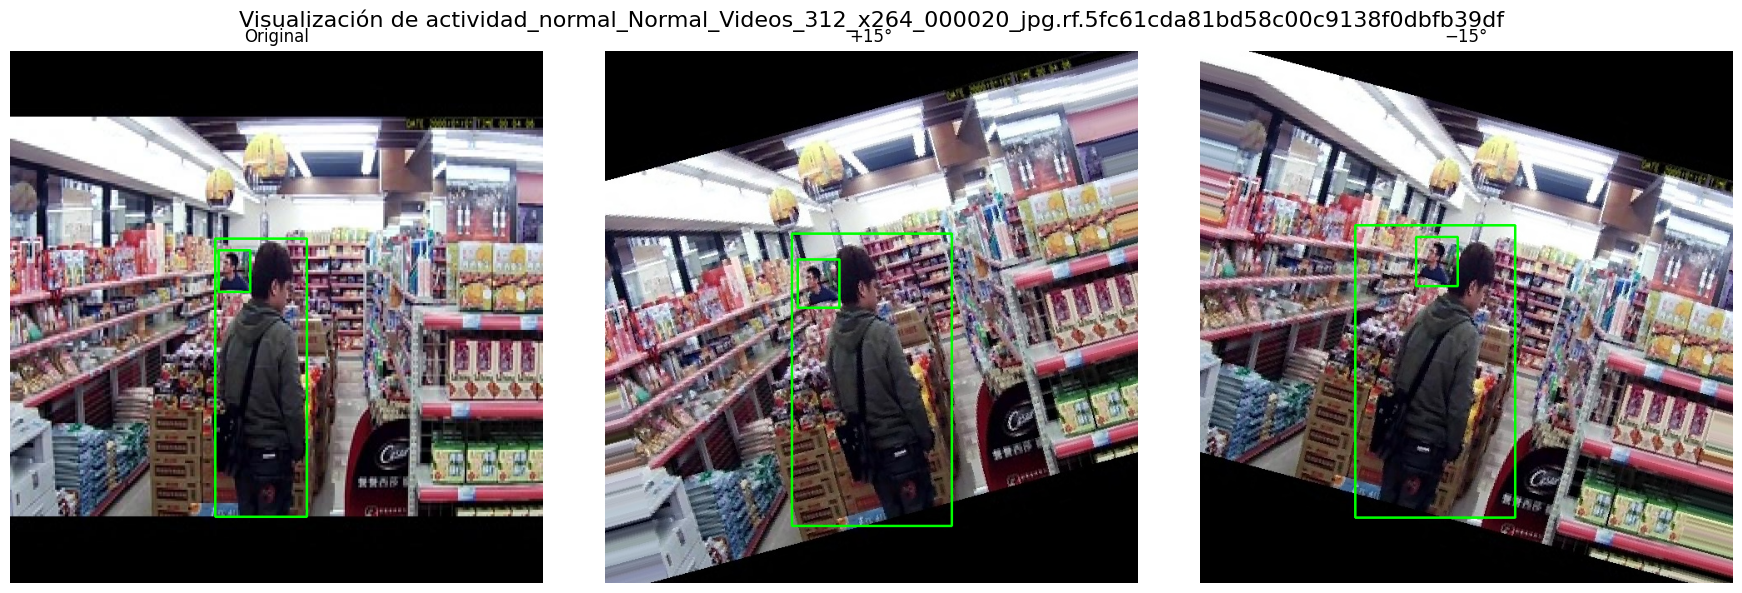

In [ ]:
visualizar_rotaciones_random()

In [ ]:
verificar_datos_unificados() #11,245

train: 9837 imágenes, 9837 etiquetas
valid: 937 imágenes, 937 etiquetas
test: 471 imágenes, 471 etiquetas


In [ ]:
config_unificado = {
    'path': './Actividades_Unified',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': clases_unificadas,
    'nc': len(clases_unificadas)
}

with open('actividades_unified.yaml', 'w') as f:
    yaml.dump(config_unificado, f, default_flow_style=False)

print(f"YAML creado con {len(clases_unificadas)} clases")

YAML creado con 6 clases


In [ ]:
# Mostrar contenido del YAML
with open('actividades_unified.yaml', 'r') as f:
    print("\nContenido del YAML:")
    print(f.read())


Contenido del YAML:
names:
  0: robo_mano_armada_victima
  1: robo_mano_armada_victimario
  2: robo_en_tienda_victimario
  3: vandalismo_grafiti
  4: vandalismo_victimario
  5: actividad_normal_persona
nc: 6
path: ./Actividades_Unified
test: test/images
train: train/images
val: valid/images



In [ ]:
#Numero de imagenes pro clase
from collections import Counter
import os

labels_path = '/content/Actividades_Unified/train/labels'
clases = Counter()

for file in os.listdir(labels_path):
    with open(os.path.join(labels_path, file), 'r') as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            clases[class_id] += 1

print("Instancias por clase en entrenamiento:")
for clase, count in sorted(clases.items()):
    print(f"Clase {clase}: {count} instancias")

Instancias por clase en entrenamiento:
Clase 0: 2817 instancias
Clase 1: 3552 instancias
Clase 2: 3327 instancias
Clase 3: 3687 instancias
Clase 4: 1191 instancias
Clase 5: 7029 instancias


In [ ]:
# Librerías para deep learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms



In [ ]:
# Configurar semillas para reproducibilidad
SEED = 73
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)


#Modelo


In [ ]:
#Final
YOLO_CONFIG2 = {

     # Entrenamiento
    'epochs': 50,             # entrenamiento prolongado DE 100 A MAS SE RECOMIENDA
    'imgsz': 896,             # mayor resolución para capturar mejor detalles
    'batch': 8,               # Tamaño del batch (número de imágenes procesadas antes de actualizar los pesos). A mayor batch, mayor necesidad de memoria.
    'workers': 8,             # Número de procesos de carga de datos en paralelo (CPU). Mejora velocidad de lectura de imágenes.
    'patience': 10,           # early stopping más tolerante 10  #espera esta cantidad de epocas sin mejora
    'pretrained': True,       # Ruta del modelo anterior

    # Optimizador y tasa de aprendizaje
    'lr0': 0.001,   # Más pequeño para no dañar lo aprendido
    'lrf': 0.01,              # menor decaimiento para convergencia más suave
    'momentum': 0.937,        # Momento del optimizador (sólo para SGD). Ayuda a acelerar el aprendizaje al suavizar los pasos.
    'weight_decay': 0.0005,   # Penalización por pesos grandes (regularización L2). Evita sobreajuste.


    # Warmup (fase inicial del entrenamiento con menor tasa de aprendizaje)
    'warmup_epochs': 3,       # Cantidad de épocas con warmup (tasa de aprendizaje progresiva).
    'warmup_momentum': 0.8,   # Momento inicial durante warmup.
    'warmup_bias_lr': 0.1,    # Tasa de aprendizaje inicial para los sesgos (biases).

    # Pérdidas
    'box': 4,               # Ponderación de la pérdida de caja (bounding box).
    'cls': 0.5,               # Ponderación de la pérdida de clasificación.
    'dfl': 1.5,               # Ponderación para la pérdida "Distribution Focal Loss" (ayuda en precisión de cajas).
    'nbs': 64,                # Número base de batch size para escalamiento de learning rate.


    # Aumentos de datos (Data Augmentation)
    'hsv_h': 0.015,           # Variación del matiz (color) en HSV.
    'hsv_s': 0.7,             # Variación de saturación en HSV.
    'hsv_v': 0.4,             # Variación de brillo en HSV.
    'degrees': 0 ,            # Rotación aleatoria de imágenes (en grados).
    'translate': 0.2,         #	Traslación aleatoria (desplazamiento) de imagen. Aporta robustez a variaciones reales
    'scale': 0.5,             # Escalado aleatorio (zoom in/out).
    'shear': 0.15,           	# Sesgo angular (deformación tipo paralelogramo). Aporta robustez a variaciones reales
    'perspective': 0.0005,    # Transformación en perspectiva (cambio de ángulo de visión). default 0
    'flipud': 0,              # Volteo vertical (probabilidad 0: no se aplica).
    'fliplr': 0.5,            # Volteo horizontal (probabilidad 0.5: 50% de las veces).
    'mosaic': 1.0,            # Probabilidad de usar mosaic (combina 4 imágenes en una). Potente para aumentar contexto.
    'mixup': 0.3,             # Mezcla de imágenes y etiquetas. Útil para aumentar diversidad y prevenir overfitting. Util para tareas desequilibradas #Combaten el desbalance en clases poco frecuentes como armas
    'copy_paste': 0.3,        # Pegado aleatorio de objetos entre imágenes (aumenta clases minoritarias). ayuda si tienes pocas muestras por clase
    'augment': True,          # Aumentos de datos habilitados

    # Checkpoint
    'save_period': 5,     #	Guardado frecuente en entrenamientos largos. epocas/10

    # Otros
    'optimizer': 'SGD'
}

In [ ]:
# Cargar modelo pre-entrenado
model = YOLO(f"yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 253MB/s]


In [ ]:
# ETAPA
results = model.train(data='actividades_unified.yaml',
                      project='Actividades_detection',
                      name='actividades_unified',
                      **YOLO_CONFIG2)

Transferred 595/595 items from pretrained weights
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=4, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=actividades_unified.yaml, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0, format=torchscript, fraction=1.0, freeze=[], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=896, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=/content/drive/MyDrive/Modelos_Ruth/delitos_deteccion_model_coco_12_94.6.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=actividades_unified_finetune, nbs=64, nms=False, 

train: Scanning /content/Actividades_Unified/train/labels.cache... 3279 images, 12 backgrounds, 0 corrupt: 100%|██████████| 3279/3279 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 28.0±4.7 MB/s, size: 41.9 KB)


val: Scanning /content/Actividades_Unified/valid/labels.cache... 937 images, 0 backgrounds, 0 corrupt: 100%|██████████| 937/937 [00:00<?, ?it/s]


Plotting labels to Actividades_detection/actividades_unified_finetune/labels.jpg... 
optimizer: SGD(lr=0.0005, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 896 train, 896 val
Using 2 dataloader workers
Logging results to Actividades_detection/actividades_unified_finetune
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.3G     0.6334      0.994      1.489         33        896: 100%|██████████| 410/410 [08:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.869      0.862      0.913      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.7G     0.6046     0.8989      1.447         29        896: 100%|██████████| 410/410 [08:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.926      0.853      0.921      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        12G     0.5895     0.8556      1.426         58        896: 100%|██████████| 410/410 [08:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.909      0.819      0.903      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        12G     0.5751     0.8336      1.402         48        896: 100%|██████████| 410/410 [08:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:52<00:00,  1.13it/s]

                   all        937       2314      0.939      0.854      0.916        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        12G     0.5692     0.8181      1.398         33        896: 100%|██████████| 410/410 [08:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.936      0.819      0.889      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.9G     0.5504     0.7763      1.367         39        896: 100%|██████████| 410/410 [08:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.939      0.875      0.928      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        12G      0.549      0.782       1.38         25        896: 100%|██████████| 410/410 [08:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:52<00:00,  1.13it/s]

                   all        937       2314      0.903      0.852      0.912      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        12G     0.5409     0.7625      1.369         42        896: 100%|██████████| 410/410 [08:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314        0.9      0.849      0.899      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        12G     0.5416     0.7608      1.367         45        896: 100%|██████████| 410/410 [08:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:52<00:00,  1.12it/s]

                   all        937       2314      0.912      0.865      0.917      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.8G     0.5265     0.7364      1.343         77        896: 100%|██████████| 410/410 [08:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:52<00:00,  1.13it/s]

                   all        937       2314      0.919      0.851      0.915      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        12G     0.5845       0.84      1.418         41        896: 100%|██████████| 410/410 [08:25<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.909      0.865      0.915      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        12G     0.5745     0.8384       1.41         66        896: 100%|██████████| 410/410 [08:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:51<00:00,  1.14it/s]

                   all        937       2314      0.913      0.819      0.893      0.568
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



12 epochs completed in 1.884 hours.
Optimizer stripped from Actividades_detection/actividades_unified_finetune/weights/last.pt, 136.8MB
Optimizer stripped from Actividades_detection/actividades_unified_finetune/weights/best.pt, 136.8MB

Validating Actividades_detection/actividades_unified_finetune/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,129,346 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [01:53<00:00,  1.92s/it]


                   all        937       2314      0.943      0.887      0.942      0.612
robo_mano_armada_victima        322        612      0.952      0.839       0.92      0.622
robo_mano_armada_victimario        336        336       0.98      0.889      0.959      0.697
robo_en_tienda_victimario        212        417      0.962      0.904      0.967       0.73
    vandalismo_grafiti        196        196      0.997          1      0.995      0.546
 vandalismo_victimario        196        196      0.864      0.949      0.939      0.455
actividad_normal_persona        190        557      0.905       0.74      0.875      0.621
Speed: 0.5ms preprocess, 115.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to Actividades_detection/actividades_unified_finetune


In [ ]:
#Val
print(f"Box mAP@0.5: {results.box.map50:.4f}")
print(f"Box mAP@0.5:0.95: {results.box.map:.4f}")
print(f"precision: {results.box.mp:.4f}")
print(f"recall: {results.box.mr:.4f}")
print(f"fitness: {results.fitness:.4f}")

Box mAP@0.5: 0.9425
Box mAP@0.5:0.95: 0.6118
precision: 0.9433
recall: 0.8868
fitness: 0.6449


In [ ]:
#Guardando modelo
import shutil

# Ruta local del modelo
modelo_local = 'Actividades_detection/actividades_unified/weights/best.pt'

# Ruta de destino en Drive
ruta_destino = '/content/drive/MyDrive/Modelos_Ruth/delitos_deteccion_model_coco_12vf_94.2.pt'  #CAMBIARLO

# Copiar archivo
shutil.copy(modelo_local, ruta_destino)
print(f"✅ Modelo copiado a: {ruta_destino}")

✅ Modelo copiado a: /content/drive/MyDrive/Modelos_Ruth/delitos_deteccion_model_coco_12vf_94.2.pt


In [ ]:
#Metricas en Val del mejor modelo
# Cargar modelo entrenado
BestModel = YOLO('/content/Actividades_detection/actividades_unified/weights/best.pt')
Val_results = BestModel.val(data='actividades_unified.yaml',
                             split='val')


Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,129,346 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1519.2±506.6 MB/s, size: 48.2 KB)


val: Scanning /content/Actividades_Unified/valid/labels.cache... 937 images, 0 backgrounds, 0 corrupt: 100%|██████████| 937/937 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [02:00<00:00,  2.05s/it]


                   all        937       2314      0.926      0.853      0.921      0.609
robo_mano_armada_victima        322        612      0.916      0.824      0.908      0.599
robo_mano_armada_victimario        336        336      0.938      0.875      0.927       0.68
robo_en_tienda_victimario        212        417       0.91       0.78      0.907      0.689
    vandalismo_grafiti        196        196      0.996          1      0.995      0.625
 vandalismo_victimario        196        196      0.856       0.98      0.958      0.446
actividad_normal_persona        190        557      0.939       0.66      0.833      0.618
Speed: 2.0ms preprocess, 121.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val6


In [ ]:
print(f"Box mAP@0.5: {Val_results.box.map50:.4f}")
print(f"Box mAP@0.5:0.95: {Val_results.box.map:.4f}")
print(f"precision: {Val_results.box.mp:.4f}")
print(f"recall: {Val_results.box.mr:.4f}")
print(f"fitness: {Val_results.fitness:.4f}")

Box mAP@0.5: 0.9213
Box mAP@0.5:0.95: 0.6095
precision: 0.9261
recall: 0.8530
fitness: 0.6407
